# K - Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [2]:
retail_df = pd.read_csv("Online+Retail.csv",sep=",",encoding="ISO-8859-1",header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [6]:
round(100*retail_df.isnull().sum()/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# drop all rows having missing values
retail_df.dropna(inplace=True)
retail_df.shape

(406829, 8)

In [8]:
round(100*retail_df.isnull().sum()/len(retail_df),2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

## Prepare the data for modelling

RFM Model Analysis
    1. Recency : Number of days since last purcahse 
    2. Frequency : Number of transactions
    3. Monetary : Total amount of transcations(revenue contributed)

In [9]:
# new column : amount
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [10]:
# Monetary
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# frequeny
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
frequency.columns = ['CustomerID','frequency']

In [13]:
grouped_df = pd.merge(grouped_df,frequency, how="inner",on="CustomerID")
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# Recency
# convert to datatime : we need to specify to pandas which date format does the date have currently
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
amount         406829 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [16]:
# compute the max data
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
# compute the difference between each data and the max data
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
# Creating recency column
last_purcahse = retail_df.groupby('CustomerID')['diff'].min()
last_purcahse = last_purcahse.reset_index()
last_purcahse.columns = ['CustomerID','Recency']
last_purcahse.head()

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
#merge
grouped_df = pd.merge(grouped_df,last_purcahse,how="inner",on="CustomerID")
grouped_df.head()

,CustomerID,amount,frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [20]:
# converting to number of days only in Recency column
import datetime as dt
grouped_df['Recency'] = grouped_df['Recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


    1.Outlier treatment : treating outliers is important in clustering since outliers effects the centroids
    2.Rescaling the variables : since we can clearly see the difference in amount grequency and recency.

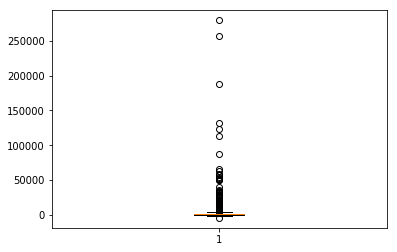

In [21]:
# Outlier treatment
plt.boxplot(grouped_df['amount'])
plt.show()

In [22]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.Recency.quantile(0.05)
Q3 = grouped_df.Recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Recency >= Q1 - 1.5*IQR) & (grouped_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]


In [23]:
# Rescaling
rfm_df = grouped_df[['amount','frequency','Recency']]
rfm_df.head()

,amount,frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_df_sc = scaler.fit_transform(rfm_df)
rfm_df_sc

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [26]:
rfm_df_sc = pd.DataFrame(rfm_df_sc)
rfm_df_sc.columns = ['amount','frequency','Recency']
rfm_df_sc.head()

,amount,frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [27]:
hopkins(rfm_df_sc)

0.9527300998357118

## Modelling

In [28]:
from sklearn.cluster import KMeans

In [29]:
# K means with some arbitrary k 
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2])

## Finding the optimal number of clusters

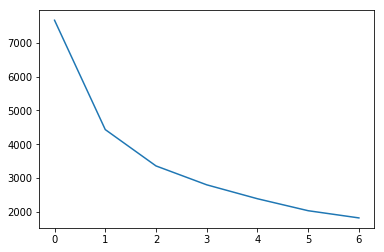

In [31]:
# Elbow curve/SSD
ssd = []
range_n = [2,3,4,5,6,7,8]
for num in range_n:
    kmeans = KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(rfm_df_sc)
    ssd.append(kmeans.inertia_) # inertia is the sum of squared distance of samples to their closest cluster centres
    
# plot thessd for each number of n clusters
plt.plot(ssd)

## Silhouette Analysis
    1. The value of silhouette score ranges lies between -1 to 1
    2. A score closer to 1 indicates that data point is very similar to the other data points in the cluster
    2. A score closert to -1 indicated that data point is not similar to the data points in the cluster

In [32]:
# silhouette Analysis
from sklearn.metrics import silhouette_score

In [33]:
range_n = [2,3,4,5,6,7,8]
for num in range_n:
    kmeans = KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(rfm_df_sc)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_sc,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5411246404292333
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.47869076802882204
For n_clusters=5, the silhouette score is 0.46613075550600325
For n_clusters=6, the silhouette score is 0.41759340426856373
For n_clusters=7, the silhouette score is 0.41498253869697127
For n_clusters=8, the silhouette score is 0.40700505321556135


In [34]:
# final model with k=3
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
len(kmeans.labels_)
print(grouped_df.shape)

(4293, 4)


In [36]:
# assign the labels to each customerID
grouped_df['clusterID'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,Recency,clusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


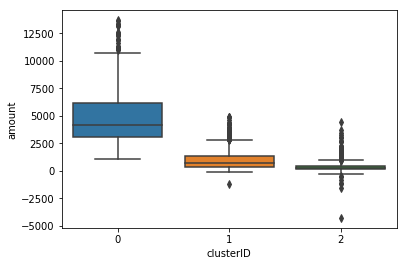

In [37]:
# plot
sns.boxplot(x='clusterID',y='amount',data=grouped_df)
plt.show()

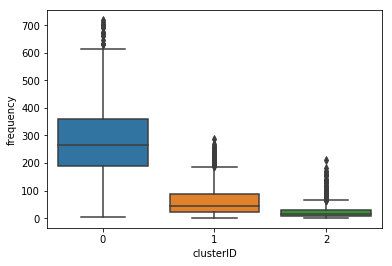

In [38]:
# plot
sns.boxplot(x='clusterID',y='frequency',data=grouped_df)
plt.show()

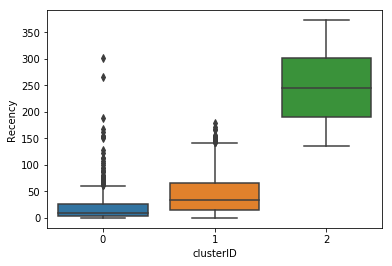

In [39]:
# plot
sns.boxplot(x='clusterID',y='Recency',data=grouped_df)
plt.show()